# VGG Net 응용하기

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg = VGG16()
vgg.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [3]:
!unzip Animals.zip -d animals

Archive:  Animals.zip
  inflating: animals/cat.jpg         
  inflating: animals/dog.jpg         
  inflating: animals/eagle.jfif      
  inflating: animals/eagle.jpg       
까치.jfif:  mismatching "local" filename (ъ╣Мь╣Ш.jfif),
         continuing with "central" filename version
  inflating: animals/까치.jfif     
까치.jpg:  mismatching "local" filename (ъ╣Мь╣Ш.jpg),
         continuing with "central" filename version
  inflating: animals/까치.jpg      
앵무새.jpg:  mismatching "local" filename (ьХ╡ым┤ьГИ.jpg),
         continuing with "central" filename version
  inflating: animals/앵무새.jpg   


In [4]:
!ls -l animals

total 536
-rw-r--r-- 1 root root  71670 Dec  8  2019 cat.jpg
-rw-r--r-- 1 root root  23346 Dec  8  2019 dog.jpg
-rw-r--r-- 1 root root   5508 Feb 17  2021 eagle.jfif
-rw-r--r-- 1 root root  62364 Feb 17  2021 eagle.jpg
-rw-r--r-- 1 root root   7578 Feb 17  2021 까치.jfif
-rw-r--r-- 1 root root  74169 Feb 17  2021 까치.jpg
-rw-r--r-- 1 root root 290449 Feb 17  2021 앵무새.jpg


In [5]:
import numpy as np
from PIL import Image

img = np.array(Image.open("animals/cat.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
Egyptian_cat (70.01%)


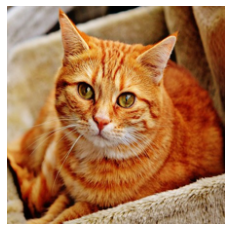

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)
plt.axis("off")
plt.show()

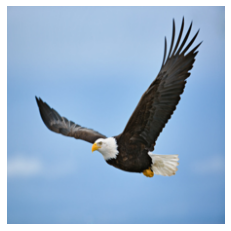

kite (67.79%)


In [11]:
img = np.array(Image.open("animals/eagle.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
plt.imshow(img)
plt.axis("off")
plt.show()

print('%s (%.2f%%)' % (label[1], label[2]*100))

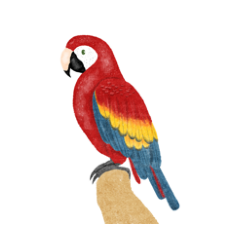

macaw (75.79%)


In [9]:
img = np.array(Image.open("animals/앵무새.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
plt.imshow(img)
plt.axis("off")
plt.show()

print('%s (%.2f%%)' % (label[1], label[2]*100))